In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [ ]:
# Step 3: Display Basic Info
print("First 5 rows of the data:")
print(df.head())

First 5 rows of the data:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.912

In [ ]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [ ]:
# Step 4: Rename columns for ease
df.columns = ['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Area', 'longitude', 'latitude']

In [ ]:
# Step 5: Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [ ]:
# Step 6: Summary Statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
                                Date  Estimated Unemployment Rate  \
count                            267                   267.000000   
mean   2020-06-16 09:15:30.337078528                    12.236929   
min              2020-01-31 00:00:00                     0.500000   
25%              2020-03-31 00:00:00                     4.845000   
50%              2020-06-30 00:00:00                     9.650000   
75%              2020-08-31 00:00:00                    16.755000   
max              2020-10-31 00:00:00                    75.850000   
std                              NaN                    10.803283   

       Estimated Employed  Estimated Labour Participation Rate   longitude  \
count        2.670000e+02                           267.000000  267.000000   
mean         1.396211e+07                            41.681573   22.826048   
min          1.175420e+05                            16.770000   10.850500   
25%          2.838930e+06                   

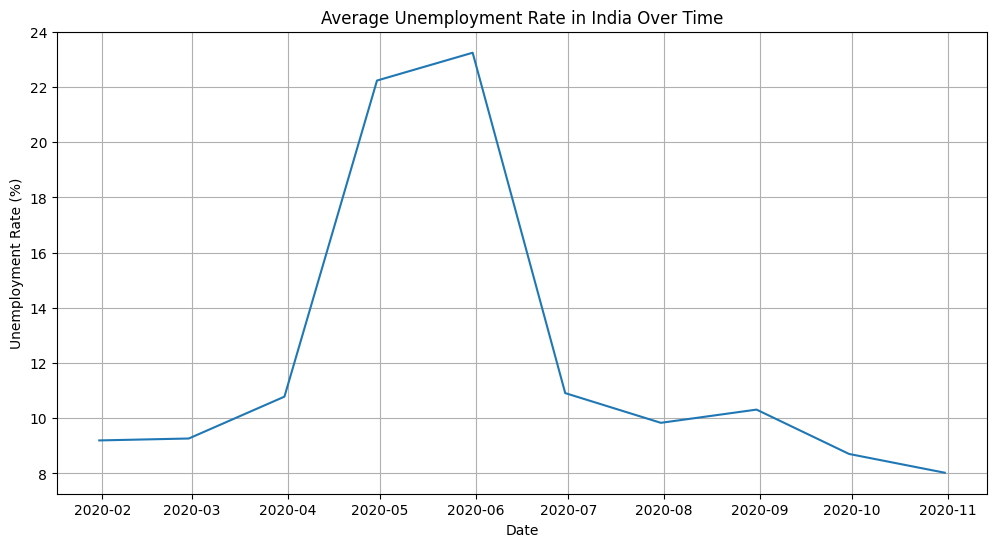

In [ ]:
# Step 7: Unemployment Trend Over Time (India Level)
plt.figure(figsize=(12,6))
sns.lineplot(data=df.groupby('Date')['Estimated Unemployment Rate'].mean())
plt.title('Average Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

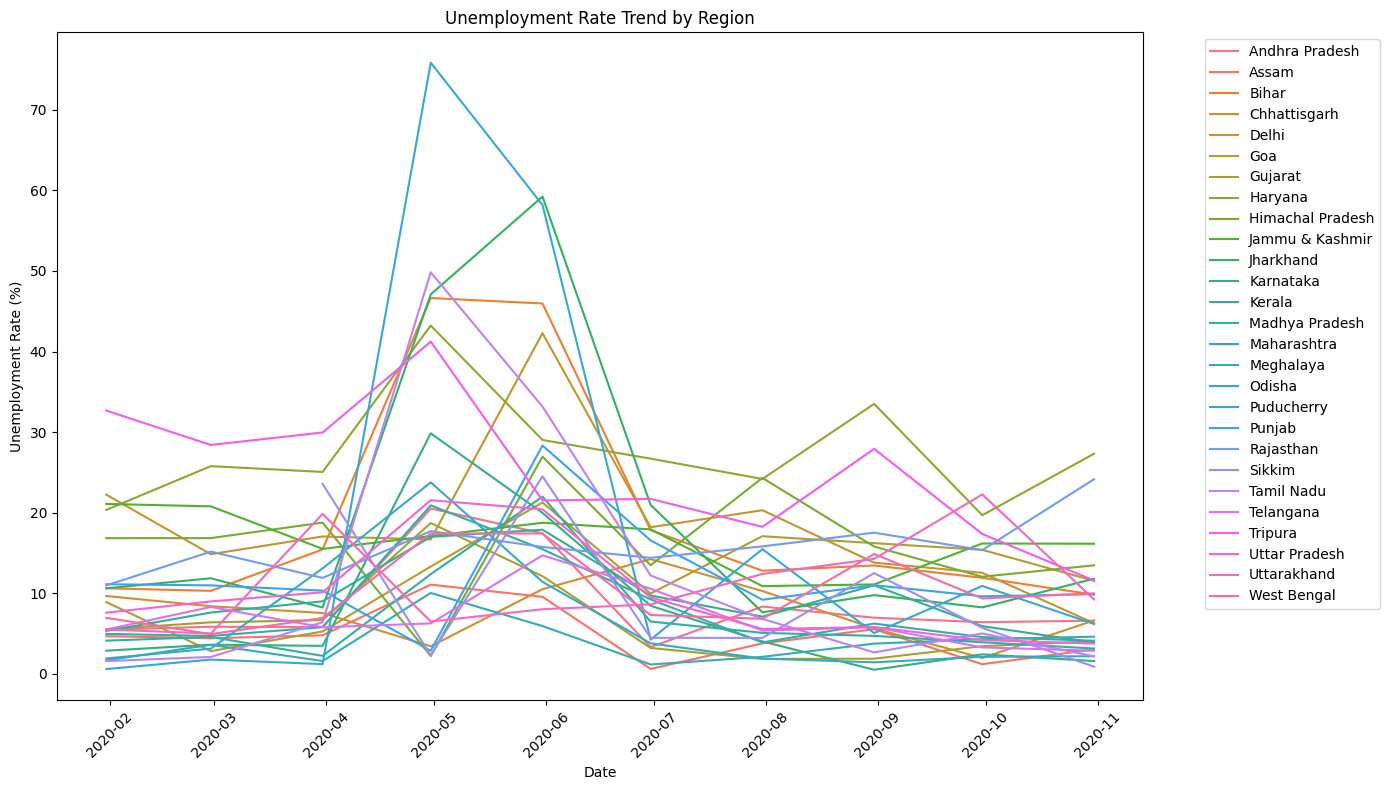

In [ ]:
# Step 8: Region-wise Unemployment Rate over Time
plt.figure(figsize=(14,8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate', hue='Region')
plt.title('Unemployment Rate Trend by Region')
plt.xticks(rotation=45)
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1767342341.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latest_data.values, y=latest_data.index, palette='coolwarm')


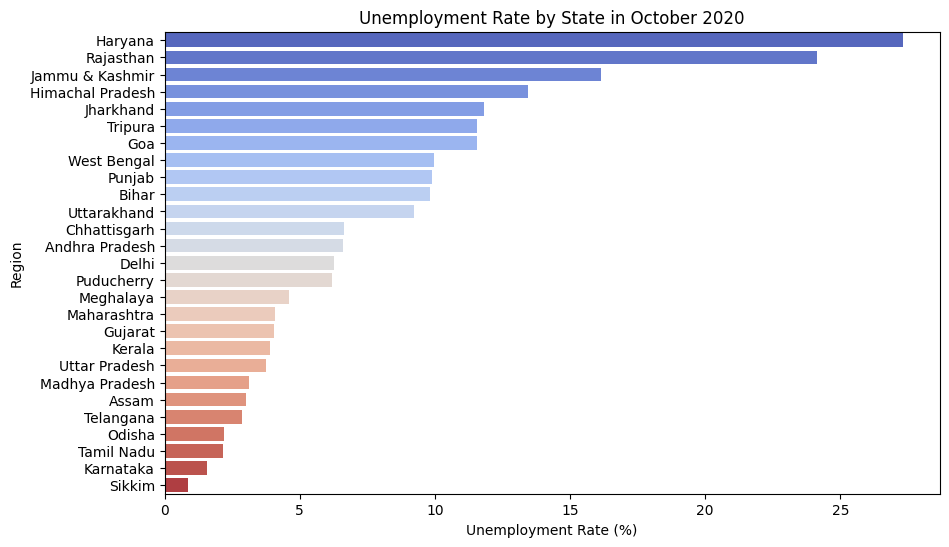

In [ ]:
# Step 9: Latest Unemployment Rate by State
latest_month = df['Date'].max()
latest_data = df[df['Date'] == latest_month]
latest_data = latest_data.groupby('Region')['Estimated Unemployment Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=latest_data.values, y=latest_data.index, palette='coolwarm')
plt.title(f'Unemployment Rate by State in {latest_month.strftime("%B %Y")}')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()

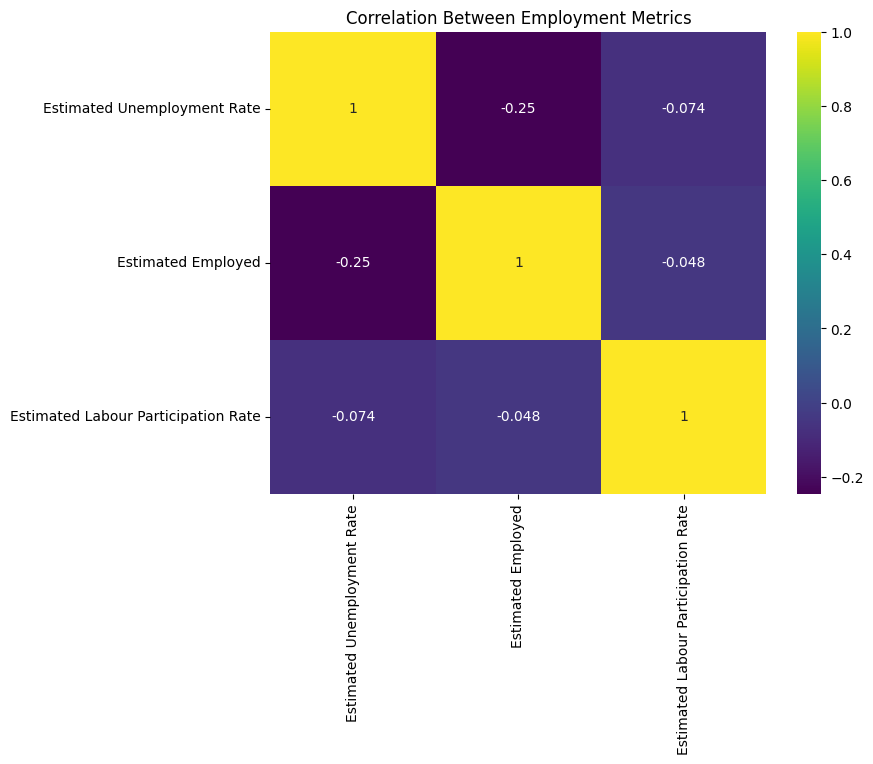

/tmp/ipython-input-12-3558091943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate', palette='Set2')


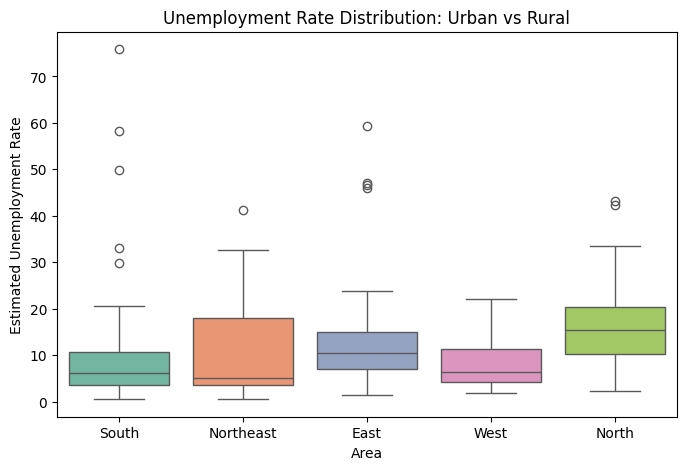

In [ ]:
# Step 10: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].corr(), annot=True, cmap='viridis')
plt.title('Correlation Between Employment Metrics')
plt.show()

# Step 11: Boxplot of Unemployment Rate by Area (Urban vs Rural)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Area', y='Estimated Unemployment Rate', palette='Set2')
plt.title('Unemployment Rate Distribution: Urban vs Rural')
plt.show()

In [ ]:
!pip install prophet

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [ ]:
# Step 2: Load the unemployment dataset
dp = pd.read_csv('Unemployment in India.csv')

In [ ]:
# Step 3: Display the first few rows
print("First 5 rows:")
print(dp.head())

print("\nInfo:")
print(dp.info())

First 5 rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entrie

In [ ]:
# Step 4: Clean column names
dp.columns = dp.columns.str.strip()

In [ ]:
# Step 5: Check for missing values
print("\nMissing values:")
print(dp.isnull().sum())


Missing values:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [ ]:
# Step 6: Convert date column to datetime
if 'Date' in dp.columns:
    dp['Date'] = pd.to_datetime(dp['Date'], dayfirst=True)
else:
    dp['Date'] = pd.to_datetime(dp['date'], dayfirst=True)


In [ ]:
# Step 7: Summary statistics
print("\nSummary Statistics:")
print(dp.describe())


Summary Statistics:
                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                    

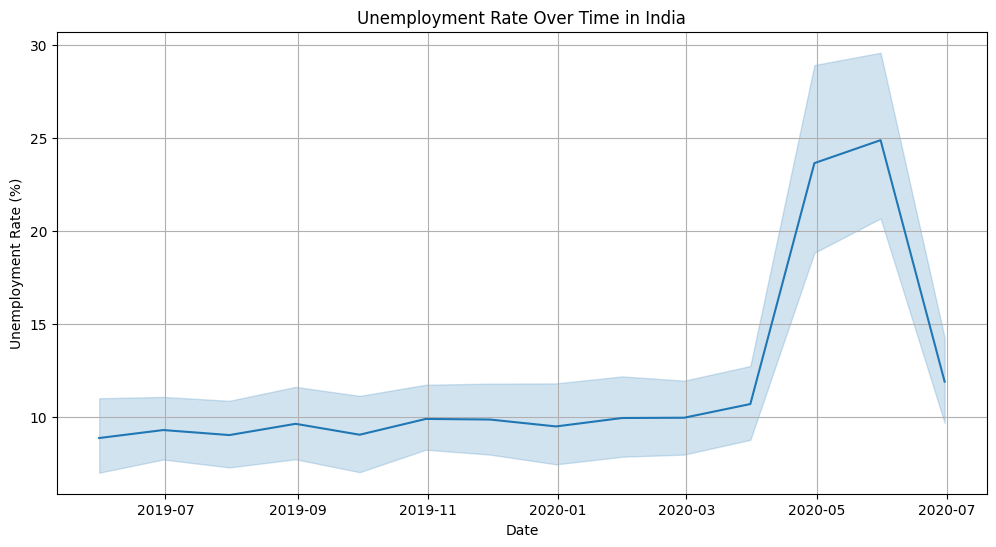

In [ ]:
# Step 8: Line plot - Unemployment over time
plt.figure(figsize=(12,6))
sns.lineplot(data=dp, x='Date', y='Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

In [ ]:
# Step 9: Barplot - Average unemployment rate by state
if 'State' in dp.columns:
    avg_state_unemp = dp.groupby('State')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,7))
    sns.barplot(x=avg_state_unemp.values, y=avg_state_unemp.index, palette='mako')
    plt.title('Average Unemployment Rate by State')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('State')
    plt.show()


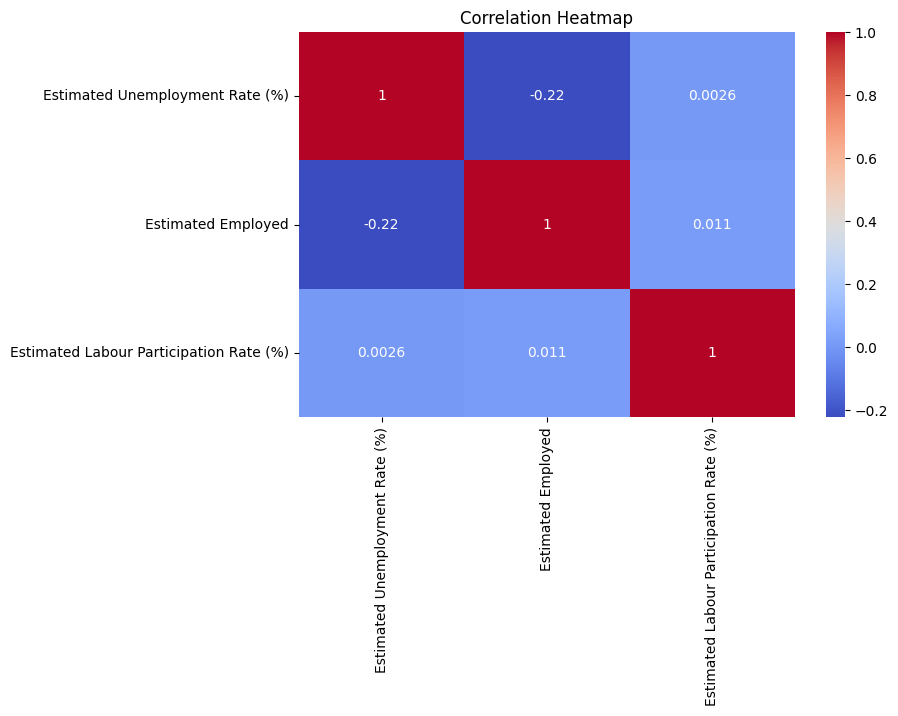

In [ ]:
# Step 10: Correlation heatmap
corr = dp.select_dtypes(include='number').corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-24-951314639.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dp, x='Area', y='Estimated Unemployment Rate (%)', palette='Set2')


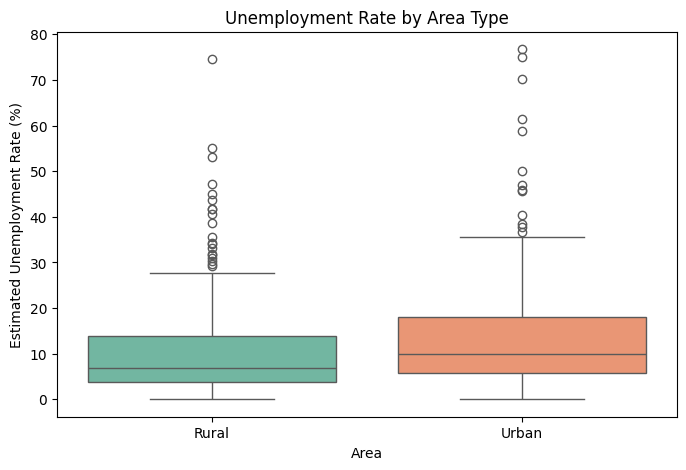

In [ ]:
# Step 11: Boxplot - Urban vs Rural comparison
if 'Area' in dp.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=dp, x='Area', y='Estimated Unemployment Rate (%)', palette='Set2')
    plt.title("Unemployment Rate by Area Type")
    plt.show()


In [ ]:
# Step 12: Prepare data for Prophet forecasting
forecast_data = dp.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()
forecast_data.columns = ['ds', 'y']


In [ ]:
# Step 13: Fit Prophet model
model = Prophet()
model.fit(forecast_data)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfnow5af/30yas98j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjfnow5af/15j8i5jv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23484', 'data', 'file=/tmp/tmpjfnow5af/30yas98j.json', 'init=/tmp/tmpjfnow5af/15j8i5jv.json', 'output', 'file=/tmp/tmpjfnow5af/prophet_modelayku9b_7/prophet_model-20250714105647.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:56:47 - cmdstanpy - INFO - Chain [1] start processing
I

In [ ]:
# Step 14: Create future DataFrame (6 months prediction)
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)


<Figure size 1400x600 with 0 Axes>

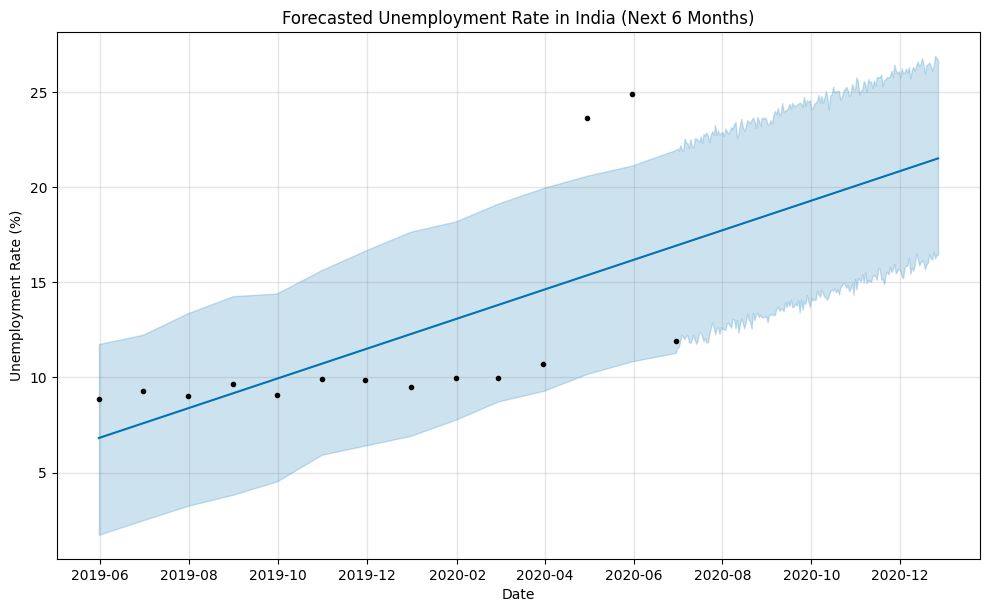

In [ ]:
# Step 15: Plot forecast
plt.figure(figsize=(14,6))
model.plot(forecast)
plt.title('Forecasted Unemployment Rate in India (Next 6 Months)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()